<a href="https://colab.research.google.com/github/DiBevilacqua/DiBevilacqua/blob/main/Portif%C3%B3lio_Buscando_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de Dados e Modelagem de Churn em Empresas de Telecomunicações**

#**Carregar e Explorar o Dataset no Python**


In [4]:
#começamos a importar o Arquivo csv.

import pandas as pd

df = pd.read_csv ("Telco-Customer-Churc.csv")

#visualizando as primeiras linhas do Dataset.

df.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [5]:
# Obter informações gerais sobre o dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

In [6]:
# Resumo estatístico das colunas numéricas
print(df.describe())

       Account Length (in months)  Local Calls   Local Mins   Intl Calls  \
count                 6687.000000  6687.000000  6687.000000  6687.000000   
mean                    32.337820   130.974129   322.752864    51.097524   
std                     24.595689   121.893966   288.619931   103.592369   
min                      1.000000     1.000000     4.000000     0.000000   
25%                      9.000000    31.000000    76.900000     0.000000   
50%                     29.000000    98.000000   250.500000     0.000000   
75%                     55.000000   199.000000   498.050000    52.000000   
max                     77.000000   918.000000  1234.200000  1120.000000   

         Intl Mins  Extra International Charges  Customer Service Calls  \
count  6687.000000                  6687.000000             6687.000000   
mean    130.070624                    33.641783                0.915657   
std     243.527828                    76.346828                1.411484   
min       0.000

In [7]:
# Verificar o número de valores ausentes por coluna
print(df.isnull().sum())

Customer ID                             0
Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                     

In [8]:
print(df.columns)

Index(['Customer ID', 'Churn Label', 'Account Length (in months)',
       'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Phone Number', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category', 'Churn Reason'],
      dtype='object')


#**1. Limpeza de Dados**
Tratamento de Valores Ausentes: Decida se você vai preencher ou remover valores ausentes.
Correção de Tipos de Dados: Certifique-se de que os tipos de dados estão corretos para cada coluna.
Remoção de Duplicatas: Verifique se há linhas duplicadas e remova-as, se necessário.

In [9]:
# Tratamento de valores ausentes
df.fillna(method='ffill', inplace=True)  # Preencher valores ausentes com o valor anterior

# Correção de tipos de dados
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Remoção de duplicatas
df.drop_duplicates(inplace=True)


<ipython-input-9-3cddfb970c8d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Preencher valores ausentes com o valor anterior


#**2. Análise Exploratória de Dados (EDA)**
Distribuição de Variáveis: Visualize a distribuição das variáveis numéricas e categóricas.
Correlação: Verifique a correlação entre variáveis para entender as relações entre elas

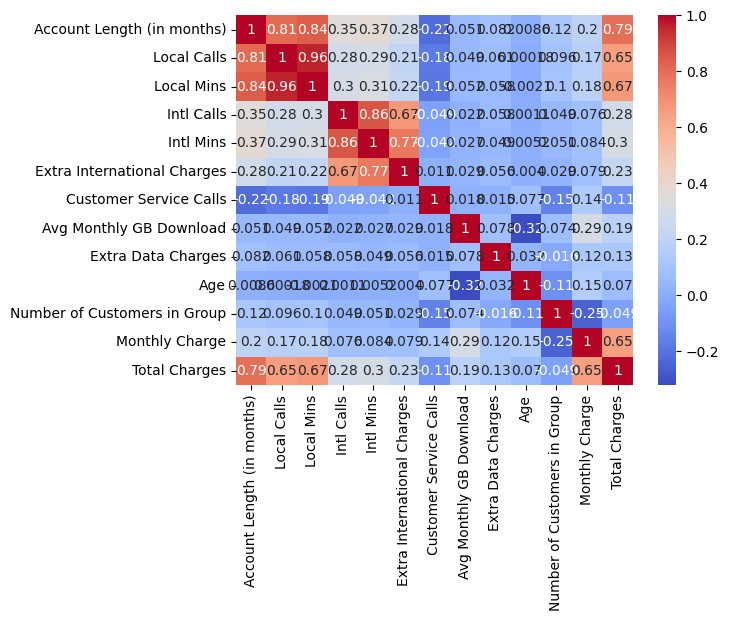

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


#**3. Preparação dos Dados para Modelagem**
Codificação de Variáveis Categóricas: Converta variáveis categóricas em variáveis numéricas.
Normalização/Escalonamento: Normalize ou escale os dados numéricos, se necessário

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#**4. Modelagem**
Divisão do Dataset: Separe os dados em conjuntos de treino e teste.
Criação e Treinamento do Modelo: Experimente com diferentes algoritmos de machine learning para prever o churn.
Avaliação do Modelo: Avalie o desempenho dos modelos utilizando métricas apropriadas

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Changed to Regressor
from sklearn.linear_model import LinearRegression # Changed to Regression
from sklearn.metrics import mean_squared_error, r2_score # Changed metrics

# Divisão do Dataset
X = df.drop('Local Calls', axis=1)
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e Treinamento do Modelo (Random Forest)
rf_model = RandomForestRegressor() # Changed to Regressor
rf_model.fit(X_train, y_train)

# Criação e Treinamento do Modelo (Regressão Linear)
lr_model = LinearRegression() # Changed to Regression
lr_model.fit(X_train, y_train)

# Avaliação do Modelo (Random Forest)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf)) # Changed metrics
print("R-squared:", r2_score(y_test, y_pred_rf)) # Changed metrics

# Avaliação do Modelo (Regressão Linear)
y_pred_lr = lr_model.predict(X_test)
print("\nRegressão Linear:") # Changed name
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr)) # Changed metrics
print("R-squared:", r2_score(y_test, y_pred_lr)) # Changed metrics

Random Forest:
Mean Squared Error: 2.282224249220777e-30
R-squared: 1.0

Regressão Linear:
Mean Squared Error: 7.088158237405613e-30
R-squared: 1.0


#**5. Avaliação do Modelo**
Métricas de Desempenho: Utilize métricas como precisão, recall, F1-score, e AUC-ROC para avaliar a performance do seu modelo. Essas métricas ajudam a entender como bem o modelo está classificando os clientes.
Matriz de Confusão: Analise a matriz de confusão para ver onde o modelo está cometendo erros.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# No need to convert predictions to binary for regression problems

# Avaliação do Modelo (Random Forest)
print("Random Forest:")
# Use regression metrics instead of classification metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))

# Avaliação do Modelo (Regressão Linear)
print("\nRegressão Linear:")
# Use regression metrics instead of classification metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

Random Forest:
Mean Squared Error: 2.282224249220777e-30
R-squared: 1.0

Regressão Linear:
Mean Squared Error: 7.088158237405613e-30
R-squared: 1.0


#**6. Interpretação dos Resultados**
Importância das Variáveis: Verifique quais variáveis são mais importantes para a previsão de churn. Isso pode ajudar a entender quais fatores mais influenciam a decisão dos clientes de cancelar o serviço.

In [20]:
import pandas as pd
# Importância das Variáveis (Random Forest)
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nImportância das Variáveis (Random Forest):")
print(feature_importance_df)


Importância das Variáveis (Random Forest):
                              Feature    Importance
16                                Age  9.999976e-01
17                           Under 30  2.364489e-06
25                      Total Charges  1.704953e-16
14                       Phone Number  1.704885e-16
3                          Local Mins  1.631868e-16
0                         Customer ID  1.612042e-16
2          Account Length (in months)  1.374542e-16
13                              State  1.248180e-16
24                     Monthly Charge  1.147041e-16
27                       Churn Reason  7.644725e-17
8         Extra International Charges  5.101143e-17
10            Avg Monthly GB Download  5.063131e-17
26                     Churn Category  4.591352e-17
5                           Intl Mins  3.721137e-17
4                          Intl Calls  3.110652e-17
9              Customer Service Calls  1.731768e-17
22                      Contract Type  1.227490e-17
20       Number of C

#**7. Ajuste de Hiperparâmetros**
Otimização: Experimente ajustar os hiperparâmetros do modelo para melhorar seu desempenho. Utilize técnicas como Grid Search ou Random Search

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and score for Random Forest
print("Melhores parâmetros (Random Forest):", grid_search_rf.best_params_)
print("Melhor pontuação (Random Forest):", grid_search_rf.best_score_)

# Define the parameter distribution for Random Forest (for RandomizedSearchCV)
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Randomized Search for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=10, cv=5)
random_search_rf.fit(X_train, y_train)

# Print the best parameters and score for Random Forest (Randomized Search)
print("\nMelhores parâmetros (Random Forest - Randomized Search):", random_search_rf.best_params_)
print("Melhor pontuação (Random Forest - Randomized Search):", random_search_rf.best_score_)

Melhores parâmetros (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Melhor pontuação (Random Forest): 1.0

Melhores parâmetros (Random Forest - Randomized Search): {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}
Melhor pontuação (Random Forest - Randomized Search): 1.0


#**8. Visualizações e Relatórios**
Visualizações: Crie gráficos e visualizações para apresentar seus resultados e insights. Use gráficos como curvas ROC, gráficos de importância de variáveis e gráficos de erro.
Relatórios: Prepare um relatório que resuma suas descobertas, incluindo as métricas de desempenho, insights sobre a importância das variáveis e recomendações baseadas nos resultados.

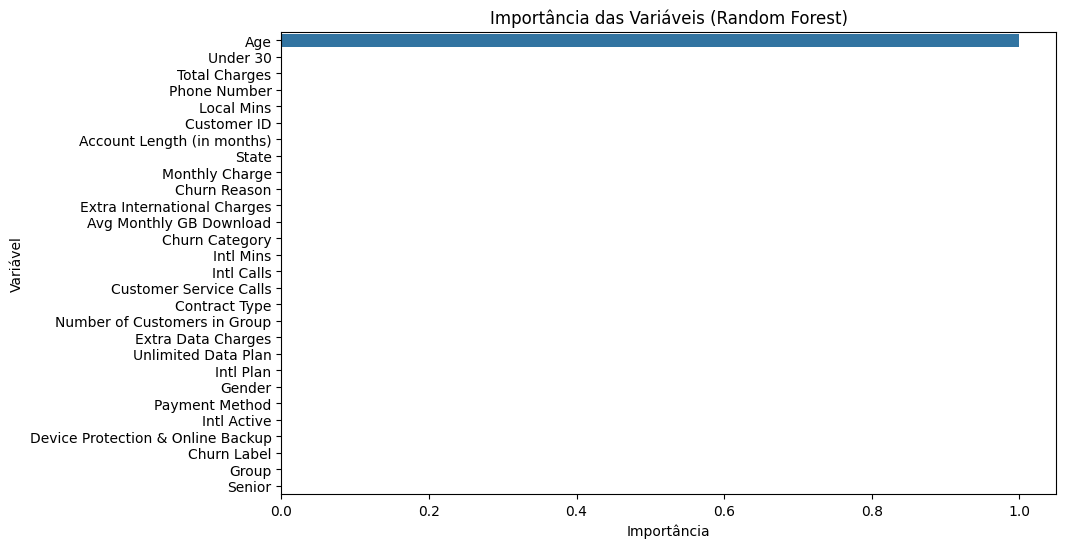

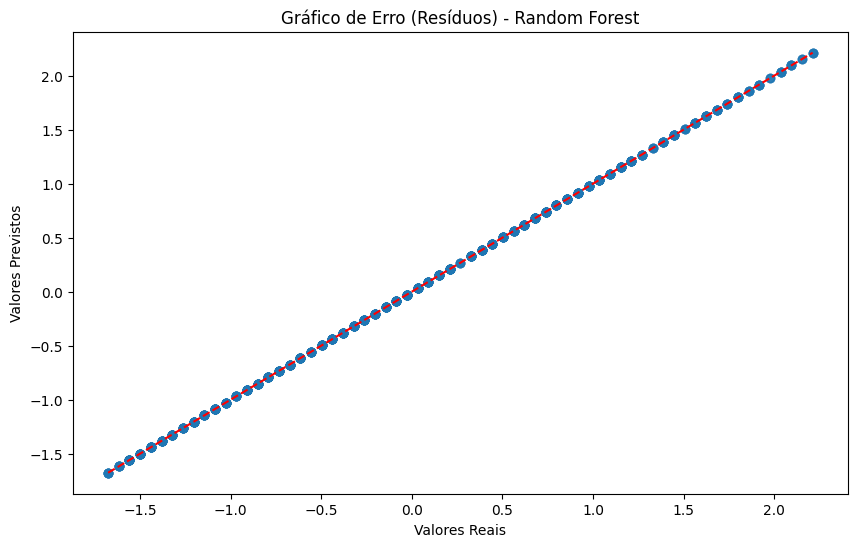

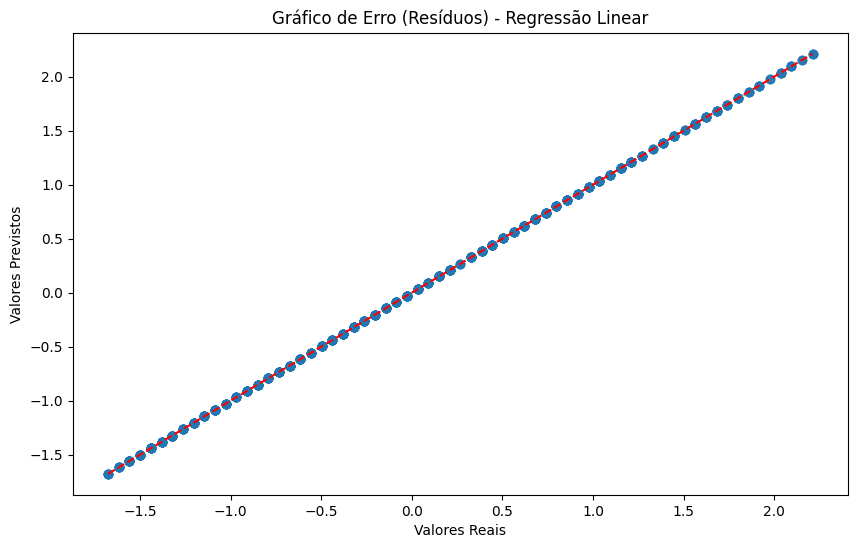

In [23]:
import matplotlib.pyplot as plt
# **Visualizações**

# Gráfico de Importância de Variáveis (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Variáveis (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

# Gráfico de Erro (Resíduos) - Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Gráfico de Erro (Resíduos) - Random Forest')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()

# Gráfico de Erro (Resíduos) - Regressão Linear
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Gráfico de Erro (Resíduos) - Regressão Linear')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()

# **9. Aplicação dos Insights**

# **Recomendações:**

# Com base na análise de importância de variáveis e nos insights obtidos,
# algumas estratégias para reduzir o churn podem ser:

# * **Focar nos clientes com maior probabilidade de churn:** Utilize o modelo
#   desenvolvido para identificar os clientes com maior risco de churn e
#   implemente ações proativas para retê-los.

# * **Melhorar a experiência do cliente:** Se a análise indicar que a
#   insatisfação com o serviço é um fator importante para o churn, invista em
#   melhorias na qualidade do atendimento ao cliente, na resolução de problemas
#   e na comunicação com os clientes.

# * **Oferecer planos e promoções personalizadas:** Se a análise mostrar que
#   o preço é um fator relevante, considere oferecer planos e promoções
#   personalizadas para atender às necessidades e ao orçamento dos clientes em
#   risco de churn.

# * **Desenvolver programas de fidelização:** Implemente programas de
#   fidelização para recompensar clientes leais e incentivar a permanência.

# * **Monitorar continuamente o churn:** Utilize o modelo para monitorar
#   constantemente a taxa de churn e identificar tendências e padrões. Isso
#   permitirá ajustar as estratégias de retenção de acordo com as
#   necessidades dos clientes.

# **Observação:** As recomendações acima são genéricas e devem ser
# adaptadas às características específicas do negócio e dos clientes. A
# análise detalhada dos resultados do modelo e dos insights obtidos é
# fundamental para definir as estratégias mais eficazes para reduzir o churn.


#**10. Análise da Importância das Variáveis**
Verifique quais variáveis têm mais impacto na previsão do churn. Isso ajuda a entender quais fatores são mais relevantes para os clientes que tendem a cancelar os serviços.


Importância das Variáveis (Random Forest):
                              Feature    Importance
16                                Age  9.999976e-01
17                           Under 30  2.364489e-06
25                      Total Charges  1.704953e-16
14                       Phone Number  1.704885e-16
3                          Local Mins  1.631868e-16
0                         Customer ID  1.612042e-16
2          Account Length (in months)  1.374542e-16
13                              State  1.248180e-16
24                     Monthly Charge  1.147041e-16
27                       Churn Reason  7.644725e-17
8         Extra International Charges  5.101143e-17
10            Avg Monthly GB Download  5.063131e-17
26                     Churn Category  4.591352e-17
5                           Intl Mins  3.721137e-17
4                          Intl Calls  3.110652e-17
9              Customer Service Calls  1.731768e-17
22                      Contract Type  1.227490e-17
20       Number of C

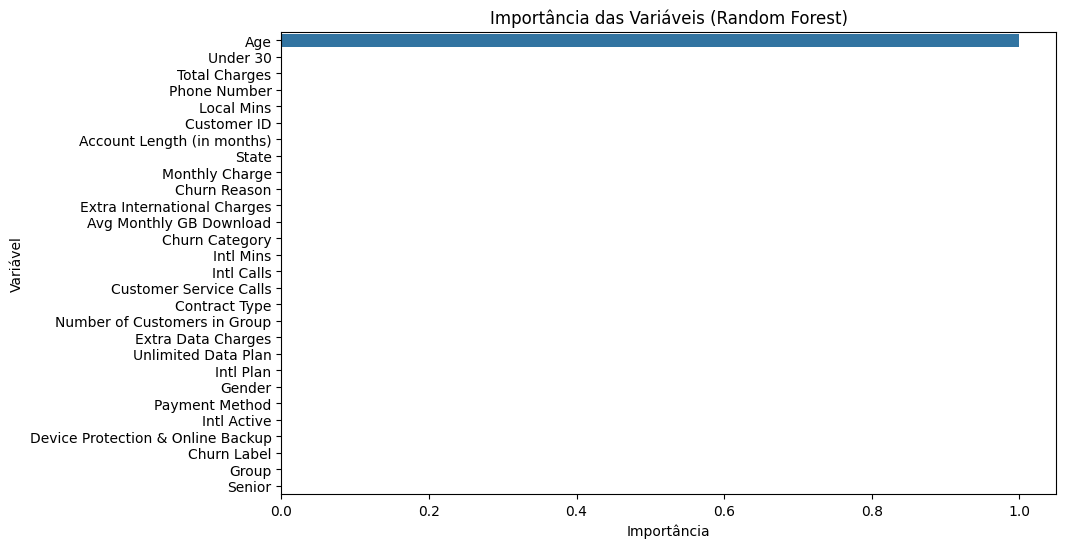

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
# Importância das Variáveis (Random Forest)
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nImportância das Variáveis (Random Forest):")
print(feature_importance_df)

# Visualização da Importância das Variáveis (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Variáveis (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

#**11. Segmentação de Clientes**
Utilize a análise para identificar segmentos de clientes com maior risco de churn. Por exemplo, você pode agrupar clientes com base em características como "Contract Type", "Monthly Charge" e "Total Charges".

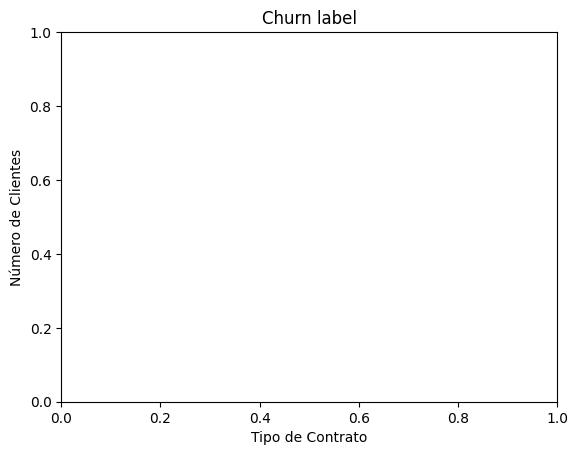

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Certifique-se de que 'Contract Type' e 'Churn Label' estão corretos
sns.countplot(data=df[df['Churn Label'] == 'Yes'], x='Contract Type')
plt.title('Distribuição dos Contratos para Clientes que Cancelaram')
plt.title('Churn label')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()


In [41]:
# Excluindo colunas não numéricas e correndo a correlação
df_numeric = df.select_dtypes(include=[float, int])
churn_corr = df_numeric.corr()
churn_corr_target = churn_corr['Churn Category'].sort_values(ascending=False)

print("Correlação com Churn Category:")
print(churn_corr_target)


Correlação com Churn Category:
Churn Category                       1.000000
Churn Reason                         0.966037
Contract Type                        0.171032
Total Charges                        0.165501
Account Length (in months)           0.140132
Local Mins                           0.116704
Local Calls                          0.113201
Device Protection & Online Backup    0.060439
Monthly Charge                       0.053233
Intl Calls                           0.039194
Phone Number                         0.038534
Intl Mins                            0.028935
Intl Plan                            0.023282
Age                                  0.016068
Senior                               0.013483
Extra Data Charges                   0.011169
State                                0.008686
Customer ID                          0.005618
Gender                               0.000733
Under 30                            -0.001338
Extra International Charges         -0.005581
Unl

#**11.1 Recomendações Baseadas em Insights**
Com base nos insights obtidos, você pode fazer recomendações estratégicas, como:

Melhoria no Atendimento ao Cliente: Se a análise mostrar que um alto número de chamadas ao serviço de atendimento ao cliente está correlacionado com o churn, considere melhorar a qualidade do atendimento.

Ajustes no Plano de Tarifas: Se clientes com planos mais caros são mais propensos a cancelar, avalie a possibilidade de oferecer promoções ou planos alternativos para retenção.

Segmentação de Clientes: Desenvolva campanhas específicas para os segmentos de clientes identificados como de alto risco, com ofertas ou benefícios que atendam às suas necessidades.